El objetivo de este notebook es conseguir unicamente los xml relacionados con subvenciones, ayudas, etc

In [7]:
# importar ElementTree xml
from xml.etree import ElementTree as ET

In [19]:
import os
import xml.etree.ElementTree as ET

# Ruta a la carpeta que contiene los archivos XML
folder_path = 'xmls/'

# Create emptry dictionary
subvenciones = {}
# Lista todos los archivos en la carpeta especificada
for filename in os.listdir(folder_path):
    if filename.endswith('.xml'):
        # Construye la ruta completa al archivo XML
        full_path = os.path.join(folder_path, filename)
        
        # Analiza el archivo XML
        tree = ET.parse(full_path)
        root = tree.getroot()
        
        # Encuentra todos los elementos 'diario'. Suponemos que solo hay uno por archivo
        for diario in root.findall('diario'):
            for seccion in diario.findall('seccion'):
                for departamento in seccion.findall('departamento'):
                    for item in departamento.findall('item'):
                        titulo = item.find('titulo').text
                        try:
                            # Hacer el titulo en minúsculas y eliminar acentos
                            titulo_en = titulo.lower()
                            titulo_en = titulo.replace('á', 'a')
                            titulo_en = titulo.replace('é', 'e')
                            titulo_en = titulo.replace('í', 'i')
                            titulo_en = titulo.replace('ó', 'o')
                            titulo_en = titulo.replace('ú', 'u')
                            titulo_en = titulo.replace('ü', 'u')
                            # Si el título contiene la palabra 'subvencion', 'ayuda' o 'beca' entonces imprimirlo
                            if 'subvencion' in titulo_en or 'ayuda' in titulo_en or 'beca' in titulo_en:
                                pdf = item.find('urlPdf').text
                                # Añadir el nombre del xml como key y pdf como value
                                subvenciones[filename] = [pdf, titulo]
                        except:
                            pass

Hemos conseguido un diccionario con el siguiente formato:

```json
{
    "nombre_xml": ["url_pdf", "texto del titulo"]
}
```

In [1]:
# Imprimir el diccionario
for key, value in subvenciones.items():
    print(key, value)
print('Número de subvenciones:', len(subvenciones))

NameError: name 'subvenciones' is not defined

In [10]:
# Creamos un diccionario por año para almacenar el recuento de subvenciones
subvenciones_por_ano = dict()

# Iteramos sobre cada clave (nombre de archivo) en el diccionario
for clave in subvenciones.keys():
    # Extraemos el año del nombre del archivo
    año = int(clave.split("-")[1][:4])
    # Si el año no está en el diccionario, lo añadimos con un recuento de 1
    if año not in subvenciones_por_ano:
        subvenciones_por_ano[año] = 1
    else:
        # Incrementamos el recuento de subvenciones para ese año
        subvenciones_por_ano[año] += 1

# Imprimimos el número de subvenciones por año
for año, num_subvenciones in sorted(subvenciones_por_ano.items()):
    print(f"Año {año}: {num_subvenciones} subvenciones")

Año 2000: 279 subvenciones
Año 2001: 291 subvenciones
Año 2002: 288 subvenciones
Año 2003: 289 subvenciones
Año 2004: 266 subvenciones
Año 2005: 115 subvenciones
Año 2006: 138 subvenciones
Año 2007: 172 subvenciones
Año 2008: 159 subvenciones
Año 2009: 136 subvenciones
Año 2010: 156 subvenciones
Año 2011: 155 subvenciones
Año 2012: 156 subvenciones
Año 2013: 197 subvenciones
Año 2014: 197 subvenciones
Año 2015: 157 subvenciones
Año 2016: 206 subvenciones
Año 2017: 237 subvenciones
Año 2018: 205 subvenciones
Año 2019: 211 subvenciones
Año 2020: 188 subvenciones
Año 2021: 215 subvenciones
Año 2022: 231 subvenciones
Año 2023: 200 subvenciones


Graficos parqa visualizar cositas jeje

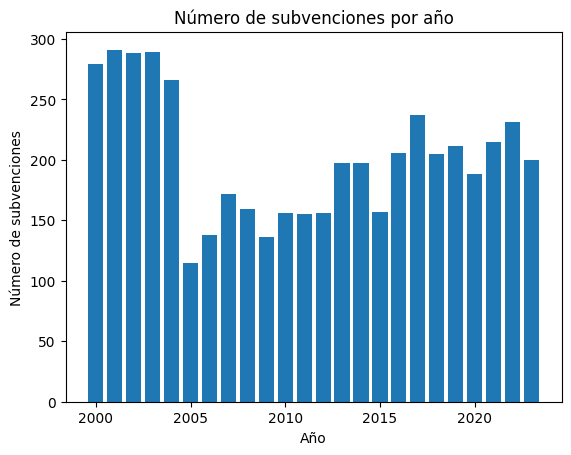

In [11]:
# visualizar el diccionario con un histograma
import matplotlib.pyplot as plt

plt.bar(subvenciones_por_ano.keys(), subvenciones_por_ano.values())
plt.xlabel('Año')
plt.ylabel('Número de subvenciones')
plt.title('Número de subvenciones por año')
plt.show()

In [12]:
subvenciones['sumario-20210529.xml']

# Imprimir el diccionario de 10 dias después de la fecha anterior
for key, value in list(subvenciones.items())[:10]:
    print(key, value)

sumario-20121002.xml /boe/dias/2012/10/02/pdfs/BOE-B-2012-33085.pdf
sumario-20210501.xml /boe/dias/2021/05/01/pdfs/BOE-B-2021-21492.pdf
sumario-20230809.xml /boe/dias/2023/08/09/pdfs/BOE-B-2023-23569.pdf
sumario-20020308.xml /boe/dias/2002/03/08/pdfs/B01811-01811.pdf
sumario-20180814.xml /boe/dias/2018/08/14/pdfs/BOE-B-2018-40904.pdf
sumario-20031205.xml /boe/dias/2003/12/05/pdfs/A43481-43481.pdf
sumario-20021016.xml /boe/dias/2002/10/16/pdfs/B08469-08469.pdf
sumario-20031211.xml /boe/dias/2003/12/11/pdfs/A44198-44212.pdf
sumario-20021002.xml /boe/dias/2002/10/02/pdfs/A34969-34973.pdf
sumario-20210515.xml /boe/dias/2021/05/15/pdfs/BOE-B-2021-24292.pdf


Quiero juntar titulo asociado a la urlPDF con nombre pdf

In [27]:
import time
import requests
import os

start_time = time.time()
# Crear una carpeta para almacenar los PDFs
os.makedirs('pdfs', exist_ok=True)

# Iterar sobre el diccionario de subvenciones

for key, value in subvenciones.items():
    value = value[0]
    # Construir la URL completa del PDF
    pdf_url = f"https://www.boe.es{value}"
    try:
        # Obtener el contenido del PDF
        pdf_content = requests.get(pdf_url).content

        # Nombre del pdf solo de pdfs para delante
        name = value.split('/pdfs/')[1]
        # Construir la ruta completa del archivo PDFs
        pdf_path = os.path.join('pdfs', name)
        # Escribir el contenido del PDF en el archivo
        with open(pdf_path, 'wb') as pdf_file:
            pdf_file.write(pdf_content)
        print(f"Descargado {pdf_path}")
    except Exception as e:
        print(f"Error al descargar {pdf_url}: {e}")

end_time = time.time()
print(f"Descarga de PDFs completada en {start_time - end_time}")

Descargado pdfs/BOE-B-2021-21492.pdf
Descargado pdfs/BOE-B-2023-23569.pdf
Descargado pdfs/B01811-01811.pdf
Descargado pdfs/BOE-B-2018-40899.pdf
Descargado pdfs/A43481-43481.pdf
Descargado pdfs/B08469-08469.pdf
Descargado pdfs/A44198-44212.pdf
Descargado pdfs/A34969-34973.pdf
Descargado pdfs/BOE-B-2021-24292.pdf
Descargado pdfs/B09787-09787.pdf
Descargado pdfs/BOE-B-2012-34935.pdf
Descargado pdfs/BOE-B-2013-46191.pdf
Descargado pdfs/BOE-B-2012-9214.pdf
Descargado pdfs/BOE-B-2017-30212.pdf
Descargado pdfs/BOE-B-2016-32221.pdf
Descargado pdfs/A03405-03406.pdf
Descargado pdfs/BOE-B-2018-41466.pdf
Descargado pdfs/B05511-05512.pdf
Descargado pdfs/B10239-10240.pdf
Descargado pdfs/BOE-B-2017-26985.pdf
Descargado pdfs/BOE-B-2021-27212.pdf
Descargado pdfs/BOE-B-2020-28947.pdf
Descargado pdfs/BOE-B-2022-10102.pdf
Descargado pdfs/BOE-B-2023-17807.pdf
Descargado pdfs/B12290-12290.pdf
Descargado pdfs/A04925-04936.pdf
Descargado pdfs/BOE-B-2019-15536.pdf
Descargado pdfs/B11714-11714.pdf
Descargado pd

In [14]:
print(subvenciones)

{'sumario-20121002.xml': '/boe/dias/2012/10/02/pdfs/BOE-B-2012-33085.pdf', 'sumario-20210501.xml': '/boe/dias/2021/05/01/pdfs/BOE-B-2021-21492.pdf', 'sumario-20230809.xml': '/boe/dias/2023/08/09/pdfs/BOE-B-2023-23569.pdf', 'sumario-20020308.xml': '/boe/dias/2002/03/08/pdfs/B01811-01811.pdf', 'sumario-20180814.xml': '/boe/dias/2018/08/14/pdfs/BOE-B-2018-40904.pdf', 'sumario-20031205.xml': '/boe/dias/2003/12/05/pdfs/A43481-43481.pdf', 'sumario-20021016.xml': '/boe/dias/2002/10/16/pdfs/B08469-08469.pdf', 'sumario-20031211.xml': '/boe/dias/2003/12/11/pdfs/A44198-44212.pdf', 'sumario-20021002.xml': '/boe/dias/2002/10/02/pdfs/A34969-34973.pdf', 'sumario-20210515.xml': '/boe/dias/2021/05/15/pdfs/BOE-B-2021-24292.pdf', 'sumario-20080814.xml': '/boe/dias/2008/08/14/pdfs/B09787-09787.pdf', 'sumario-20121016.xml': '/boe/dias/2012/10/16/pdfs/BOE-B-2012-34939.pdf', 'sumario-20131205.xml': '/boe/dias/2013/12/05/pdfs/BOE-B-2013-46218.pdf', 'sumario-20120320.xml': '/boe/dias/2012/03/20/pdfs/BOE-B-2012

In [ ]:
import requests

# URL of the PDF file to download
pdf_url = "https://boe.es/boe/dias/2021/05/15/pdfs/BOE-B-2021-24292.pdf"

# Send a GET request to the URL
response = requests.get(pdf_url)

# Check if the request was successful
if response.status_code == 200:
    # Define the path where to save the PDF file
    file_path = "pdfs/BOE-B-2021-24292.pdf"
    
    # Open the file in binary write mode and write the contents of the response
    with open(file_path, "wb") as file:
        file.write(response.content)
    
    file_path # Return the path where the file was saved
else:
    "The download was unsuccessful. Status code: {}".format(response.status_code)
